In [1]:
import os,sys,time
import ROOT
from ROOT import std
from larcv import larcv
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/04


In [2]:
segcfg="""ThreadDatumFiller: {

  Verbosity:    2
  EnableFilter: false
  RandomAccess: true
  UseThread:    false
  #InputFiles:   ["/mnt/raid0/taritree/ssnet_training_data/train00.root"]  
  #InputFiles:   ["/media/hdd1/larbys/ssnet_dllee_trainingdata/train00.root"] 
  #InputFiles:   ["/media/hdd1/larbys/ssnet_cosmic_retraining/raw/ssnet_retraining_049998.root"]
  InputFiles:   ["/media/hdd1/larbys/ssnet_cosmic_retraining/cocktail/ssnet_retrain_cocktail_p00.root"]
  ProcessType:  ["SegFiller"]
  ProcessName:  ["SegFiller"]
    
  IOManager: {
    Verbosity: 2
    IOMode: 0
    #ReadOnlyNames: ["wire","segment","ts_keyspweight"]
    ReadOnlyNames: ["adc","label","weight"]
    ReadOnlyTypes: [0,0,0]
  }  
    
  ProcessList: {
    SegFiller: {
      # DatumFillerBase configuration
      Verbosity: 2
      #ImageProducer:     "wire"
      #LabelProducer:     "segment"
      #WeightProducer:    "ts_keyspweight"
      ImageProducer:     "adc"
      LabelProducer:     "label"
      WeightProducer:    "weight"

      # SegFiller configuration
      Channels: [2]
      SegChannel: 2
      EnableMirror: false
      EnableCrop: false
      #ClassTypeList: [0,1,2]
      #ClassTypeDef: [0,0,0,2,2,2,1,1,1,1]
      ClassTypeList: [0,2,1,3]
      ClassTypeDef: [0,1,2,3,0,0,0,0,0,0]
    }
  }
}
"""

with open("segfiller.cfg",'w') as f:
    print >> f,segcfg


In [3]:
io = larcv.ThreadDatumFiller()
io.configure("segfiller.cfg")
nentries = io.get_n_entries()

 setting verbosity 2
    [NORMAL]  <ThreadDatumFiller::configure> IOManager configuration will be ignored...
    [NORMAL]  <ThreadDatumFillerProcessDriver::configure> Instantiating Process ID=0 Type: SegFiller w/ Name: SegFiller


Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class thread
Error in <CreateRealData>: Cannot find data member # 0 of class thread for parent larcv::ThreadDatumFiller!


In [4]:
s = time.time()
io.set_next_index(0);
io.batch_process(15)
io.thread_running()
s = time.time()-s
print s,"sec"

0.325259923935 sec
    [NORMAL]  <ThreadDatumFillerIOManager::prepare_input> Opening a file in READ mode: /media/hdd1/larbys/ssnet_cosmic_retraining/cocktail/ssnet_retrain_cocktail_p00.root
    [NORMAL]  <ThreadDatumFillerIOManager::initialize> Prepared input with 10886 entries...


In [5]:
print s

0.325259923935


In [6]:
dim = io.dim()
img     = larcv.as_ndarray(io.data()).reshape( (dim[0],dim[1],dim[2],dim[3]) )
labels  = larcv.as_ndarray(io.labels()).reshape( (dim[0],dim[2],dim[3]) )
weights = larcv.as_ndarray(io.weights()).reshape( (dim[0],dim[2],dim[3]) )

weights *= 1000.0

print np.unique(labels[0,:,:])

[1. 2. 3. 4.]


In [7]:
def showImgAndLabels(image2d,label2d,weight2d):
    # Dump images
    fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(10,10), facecolor='w')
    ax0.imshow(image2d,  interpolation='none', cmap='jet', origin='lower')
    ax1.imshow(label2d,  interpolation='none', cmap='jet', origin='lower',vmin=0., vmax=4.1)
    ax2.imshow(weight2d, interpolation='none', cmap='jet', origin='lower',vmin=0., vmax=10.0)
    ax0.set_title('Data',fontsize=20,fontname='Georgia',fontweight='bold')
    #ax0.set_xlim(xlim)
    #ax0.set_ylim(ylim)
    ax1.set_title('Label',fontsize=20,fontname='Georgia',fontweight='bold')
    #ax1.set_xlim(xlim)
    #ax1.set_ylim(ylim)
    ax2.set_title('Weight',fontsize=20,fontname='Georgia',fontweight='bold')
    plt.show()

<IPython.core.display.Javascript object>


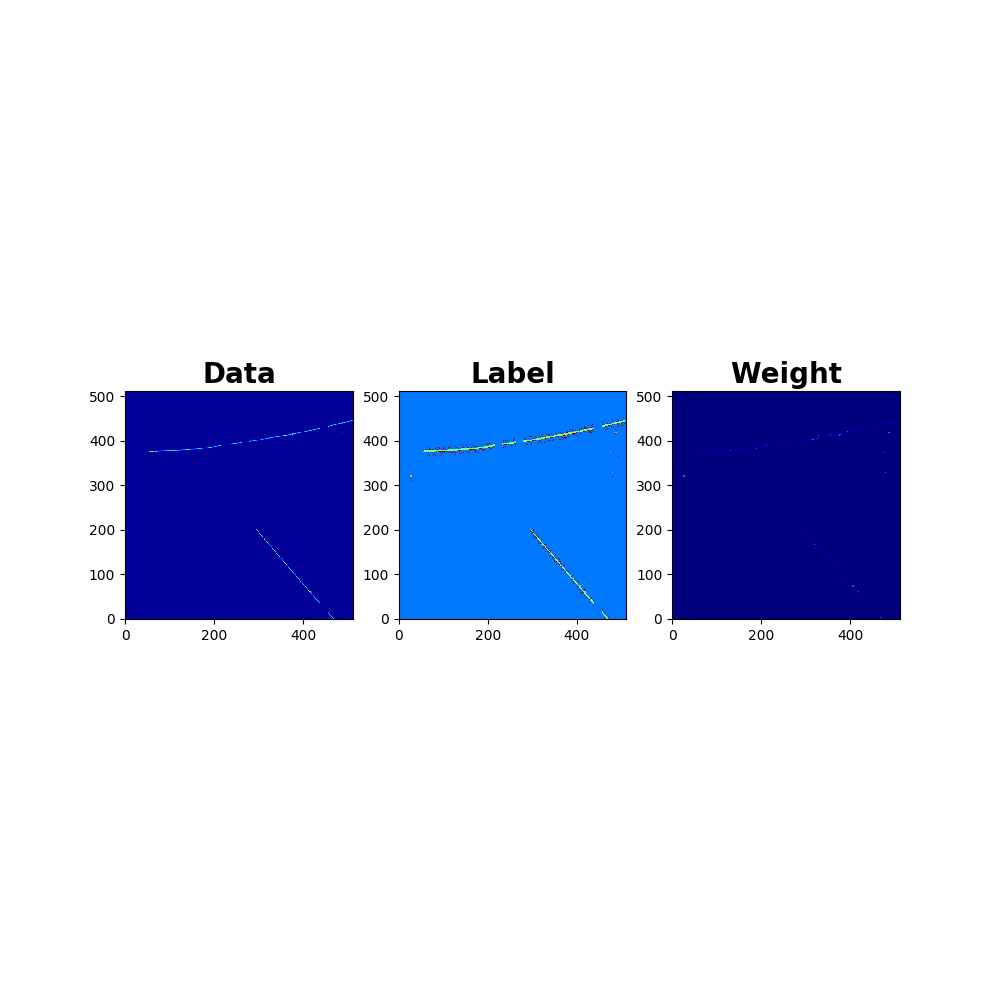

<IPython.core.display.Javascript object>


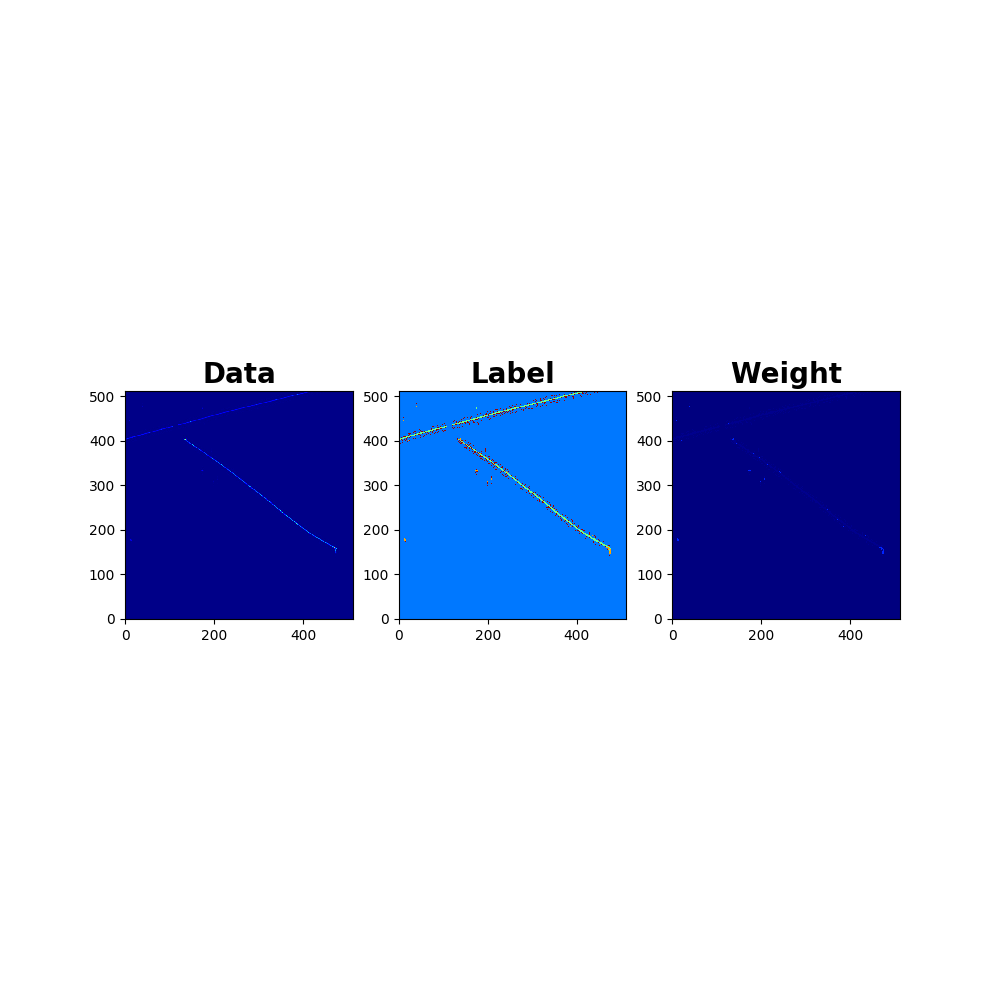

<IPython.core.display.Javascript object>


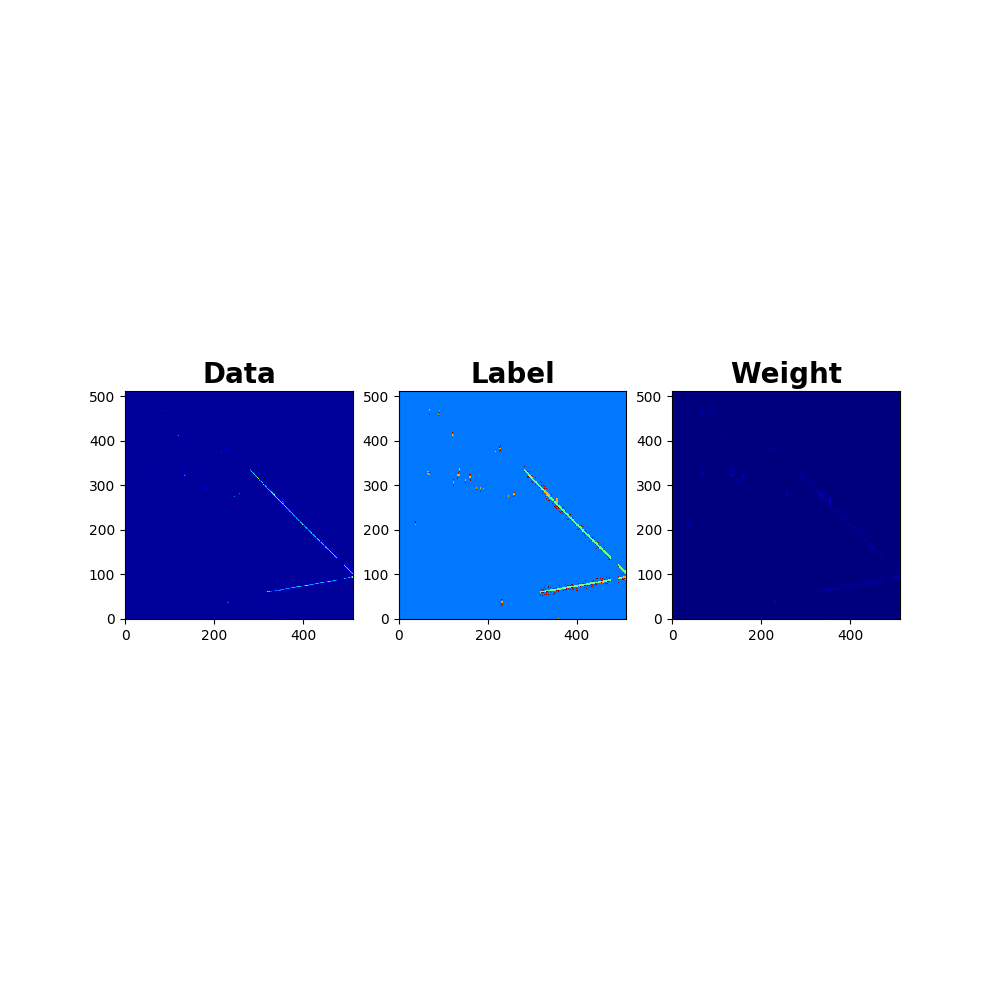

<IPython.core.display.Javascript object>


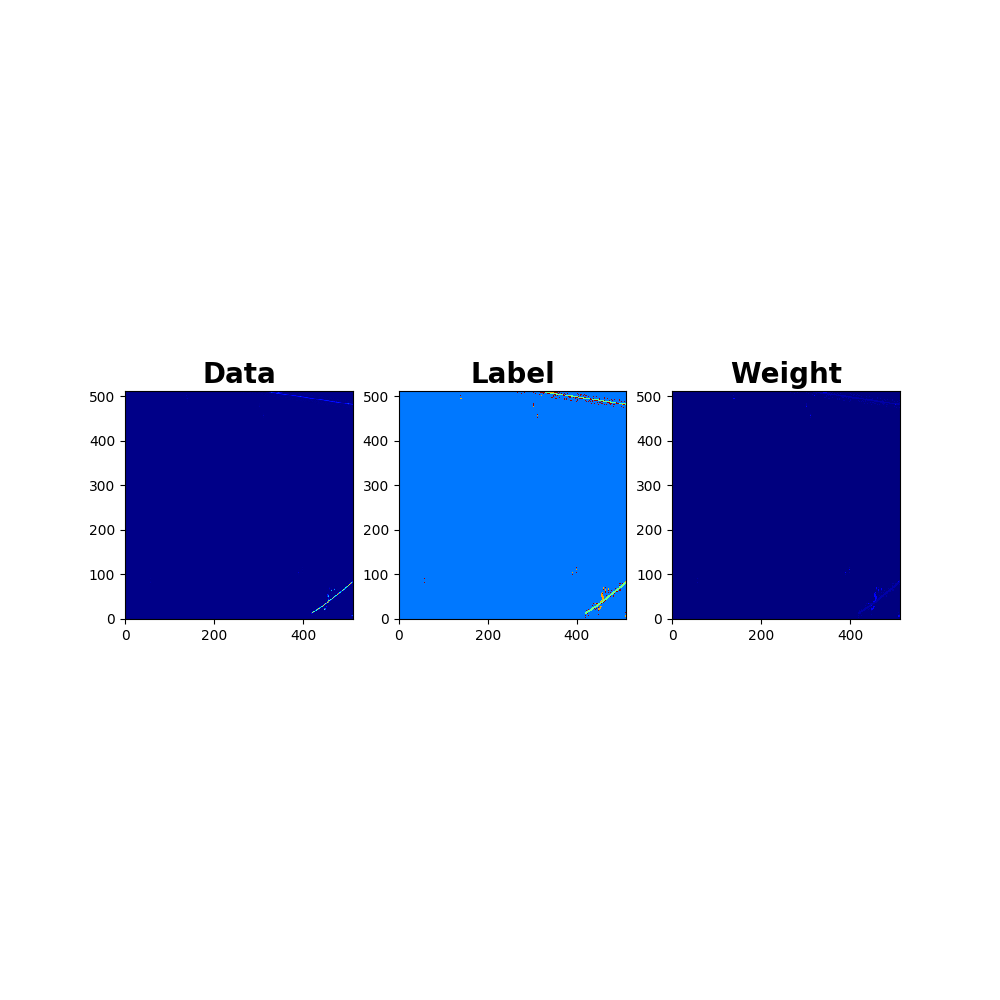

<IPython.core.display.Javascript object>


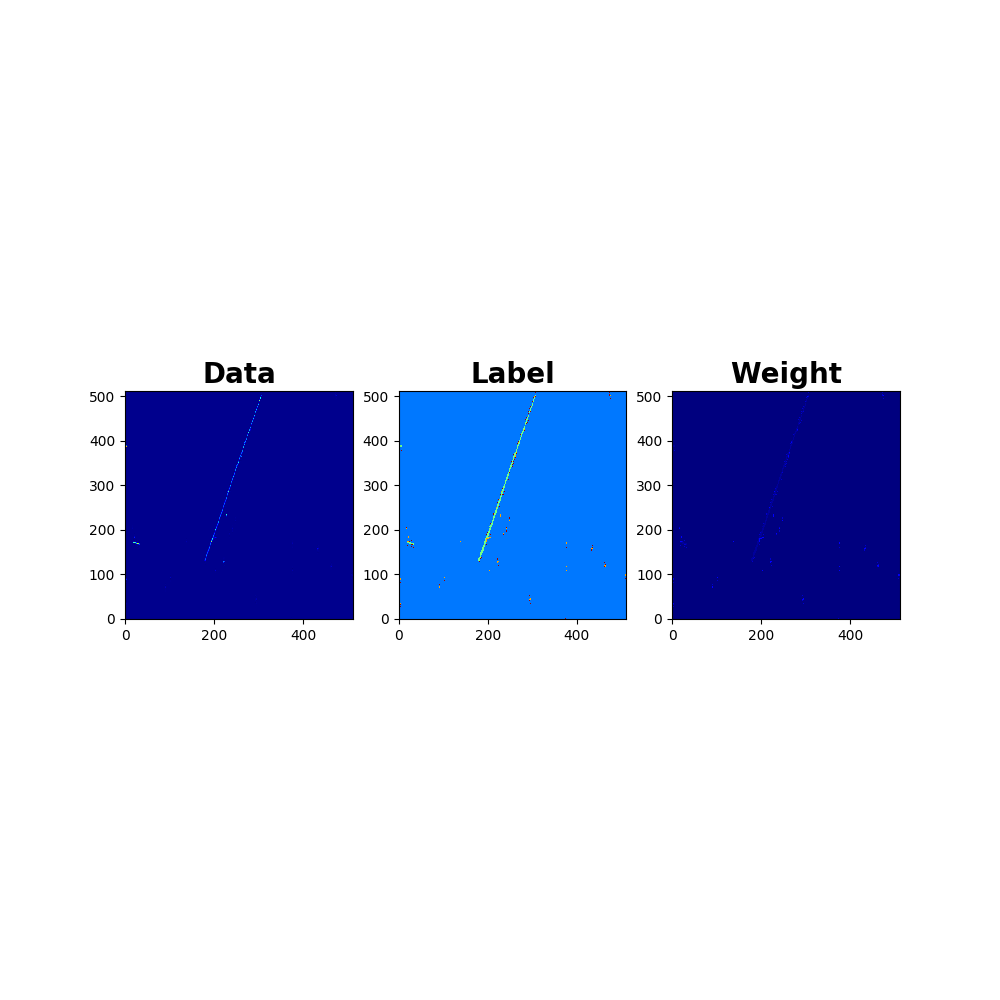

<IPython.core.display.Javascript object>


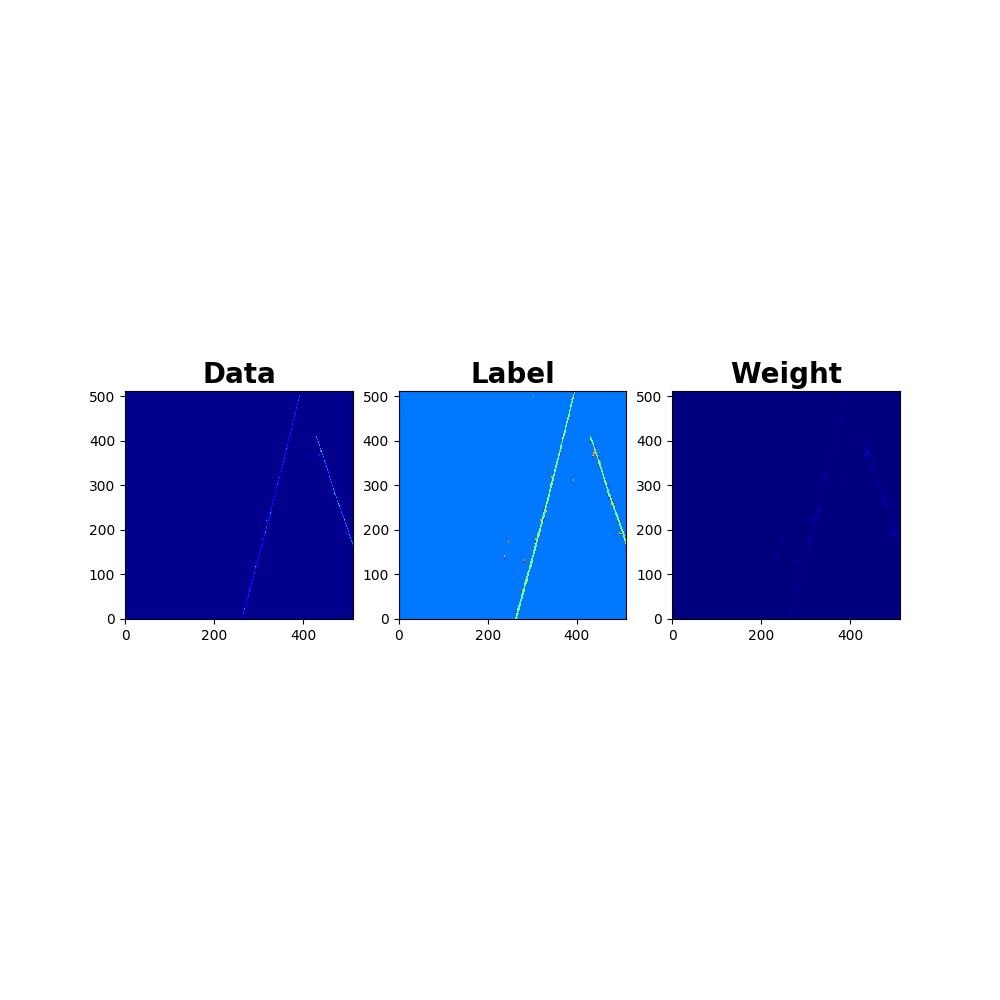

<IPython.core.display.Javascript object>


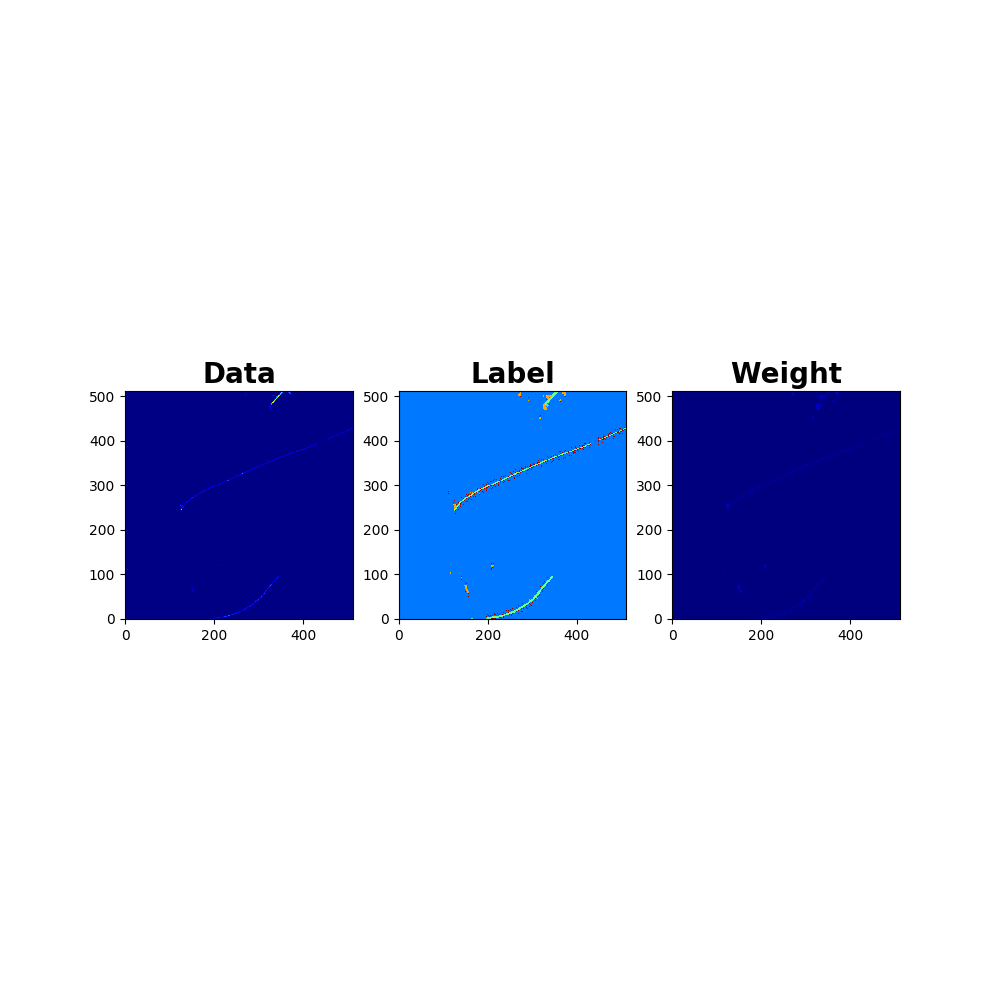

<IPython.core.display.Javascript object>


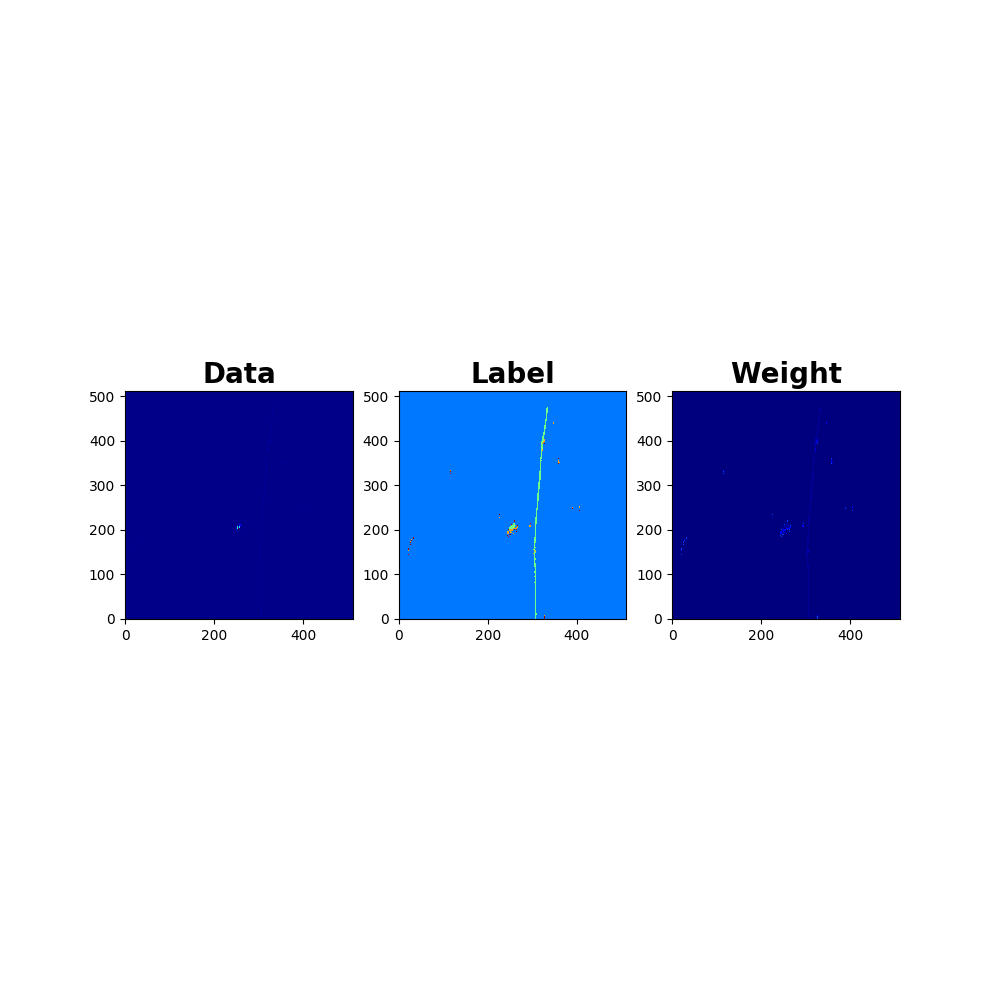

<IPython.core.display.Javascript object>


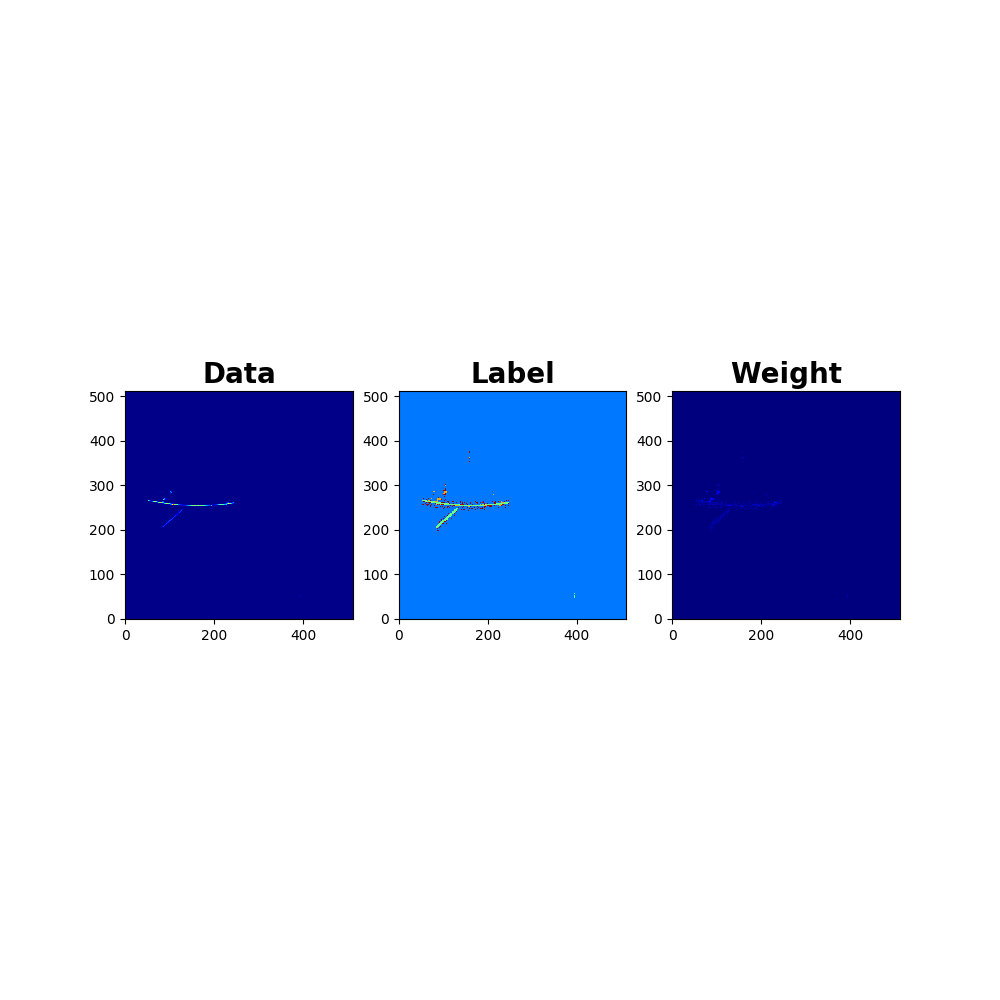

<IPython.core.display.Javascript object>


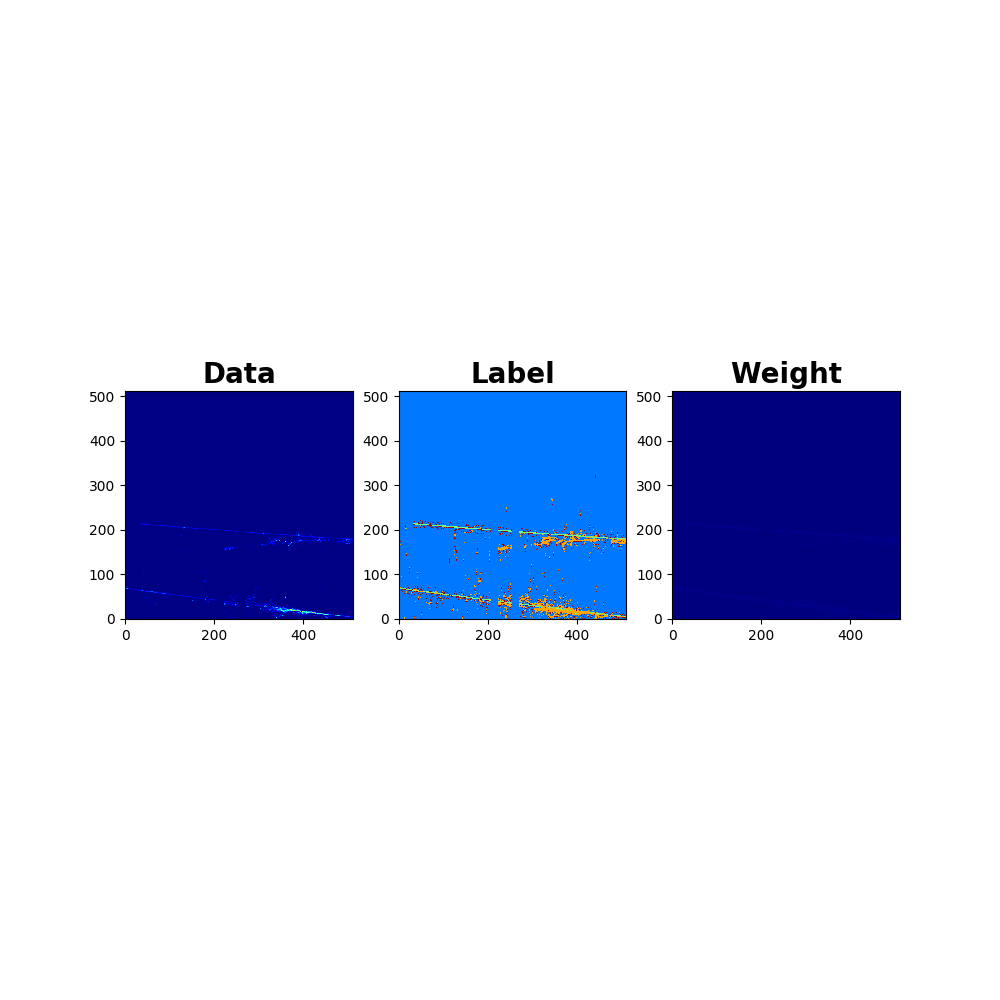

<IPython.core.display.Javascript object>


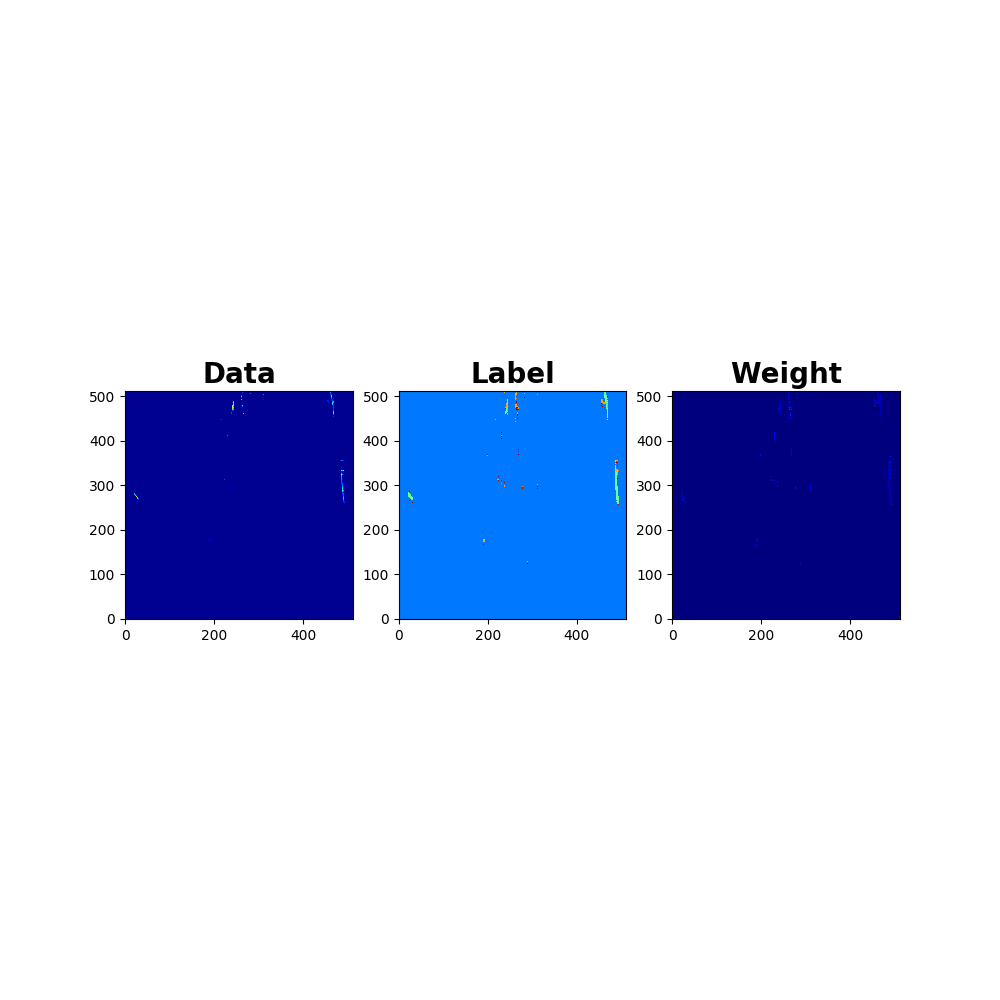

<IPython.core.display.Javascript object>


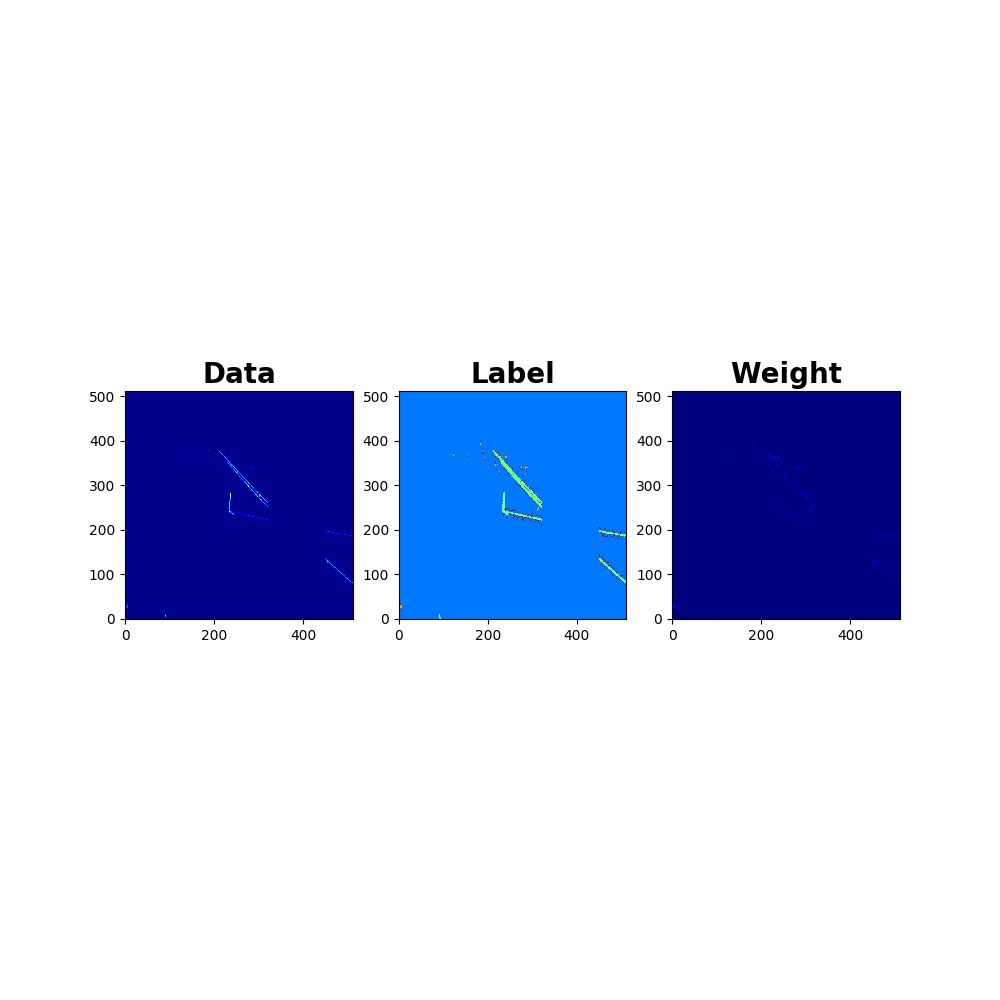

<IPython.core.display.Javascript object>


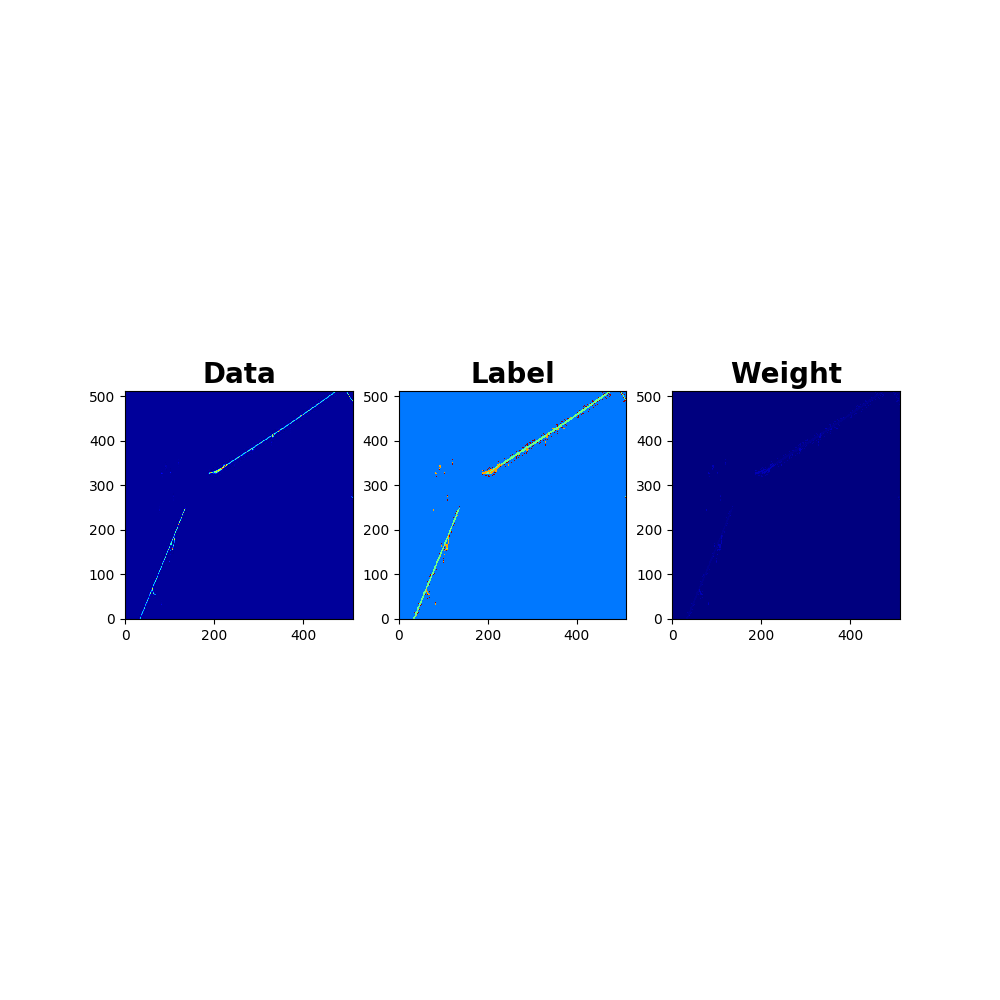

<IPython.core.display.Javascript object>


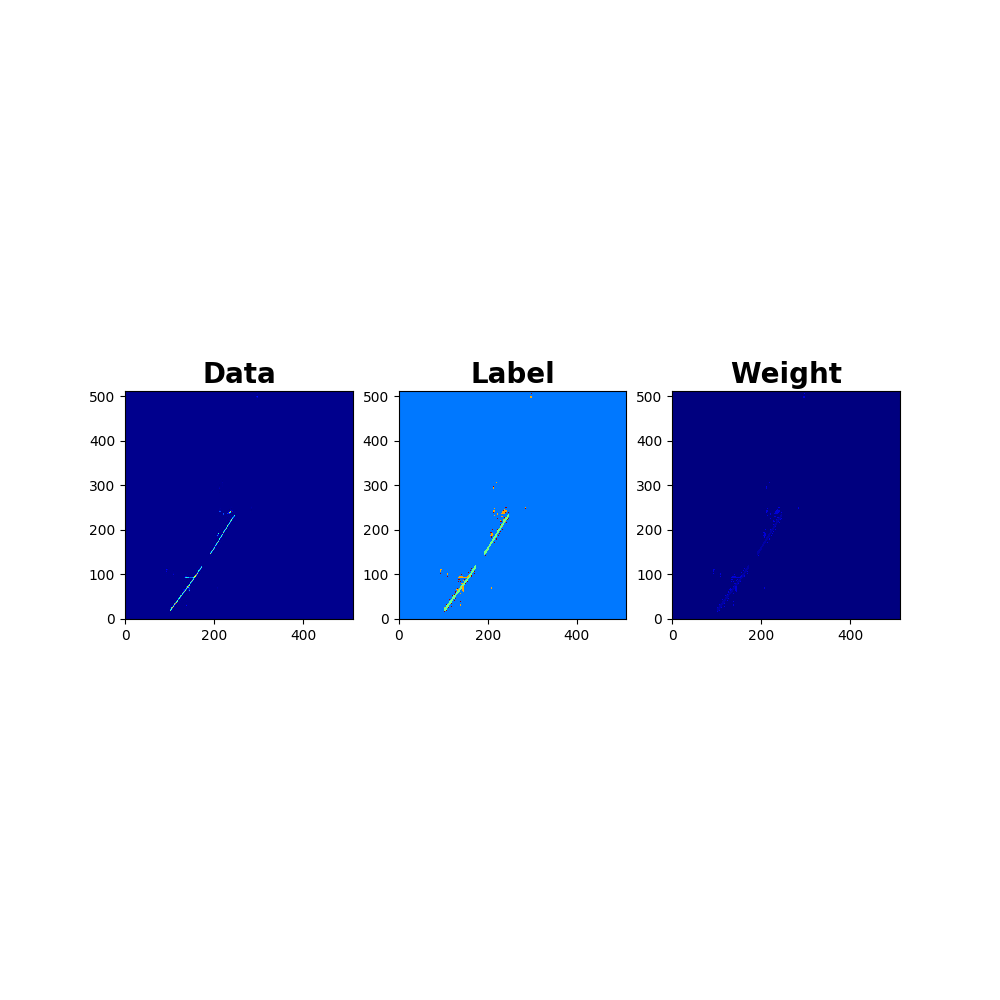

<IPython.core.display.Javascript object>


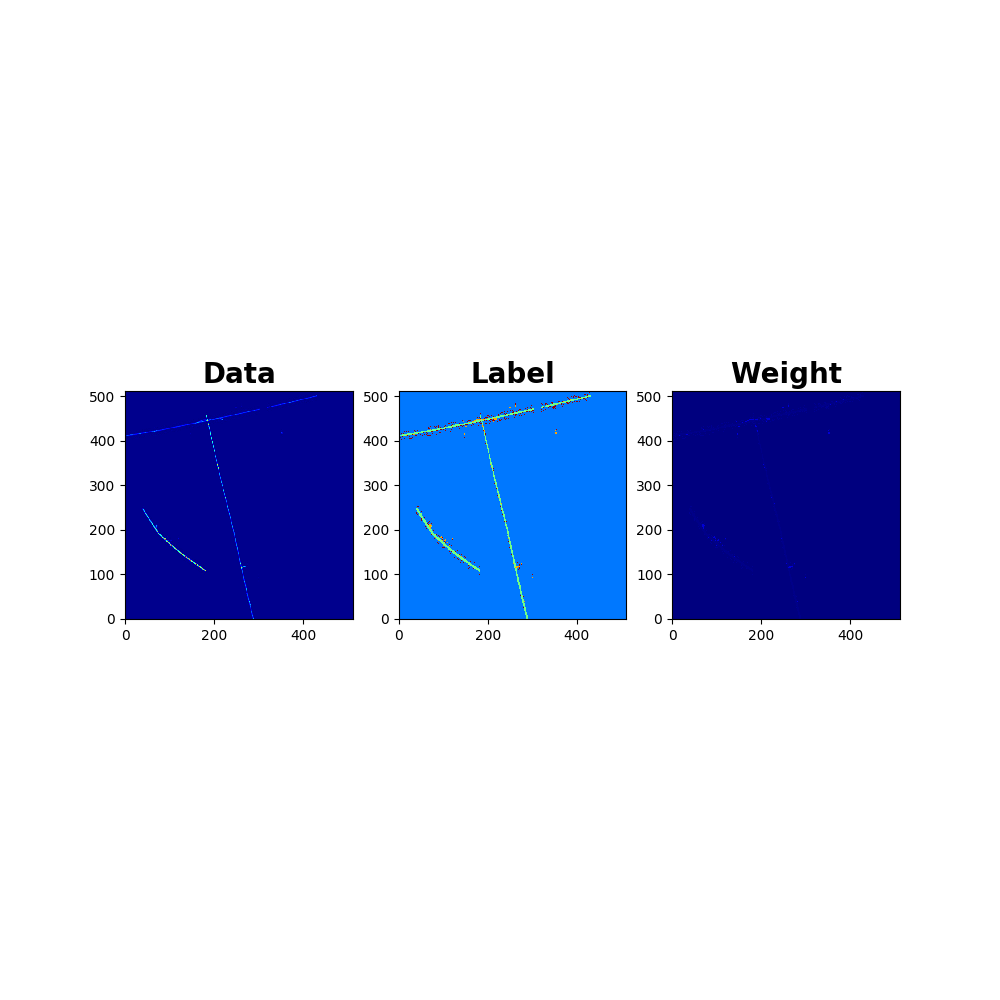

In [8]:
for batchindex in range(dim[0]):
    showImgAndLabels(img[batchindex,0,:,:],labels[batchindex,:,:],weights[batchindex,:,:])